# Setup

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

%cd ..

Setup complete. Using torch 1.8.1+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)
/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%env DATASET=DoorGit_DT
%env VERS=1.0
%env ZIP=DoorGit_DT.zip
%env SET=b32i640
%env ISIZE=640

env: DATASET=DoorGit_DT
env: VERS=1.0
env: ZIP=DoorGit_DT.zip
env: SET=b32i640
env: ISIZE=640


# Preparing the dataset

In [ ]:
%%shell
unzip -q /content/drive/MyDrive/SistemiDigitali/Datasets/"$ZIP" -d /content
echo "Done."

Done.


In [ ]:
%%shell
echo "Reduced_DT contains:"
echo "- Train images:"
ls "$DATASET"/train/images | wc -w

echo "- Test images:"
ls "$DATASET"/test/images | wc -w

echo "- Validation images:"
ls "$DATASET"/val/images | wc -w

Reduced_DT contains:
- Train images:
849
- Test images:
182
- Validation images:
182


In [ ]:
%%shell
#DoorGit
echo train: /content/"$DATASET"/train/images > /content/"$DATASET"/data.yaml
echo val: /content/"$DATASET"/test/images >> /content/"$DATASET"/data.yaml

echo ""
echo nc: 4 >> /content/"$DATASET"/data.yaml
echo names: ['doors', 'handle', 'cabinet door', 'refrigerator door'] >> /content/"$DATASET"/data.yaml

In [ ]:
%%shell
#Custom
echo train: /content/"$DATASET"/train/images > /content/"$DATASET"/data.yaml
echo val: /content/"$DATASET"/test/images >> /content/"$DATASET"/data.yaml

echo ""
echo nc: 2 >> /content/"$DATASET"/data.yaml
echo names: ['doors', 'handle'] >> /content/"$DATASET"/data.yaml

# Test

In [ ]:
%%shell
NAME=$DATASET
EXT=$SET
P=/content/drive/MyDrive/SistemiDigitali/pesi/"$NAME"/"$NAME"_"$EXT".pt

python yolov5/test.py --weights "$P" --data "$NAME"/data.yaml --img-size $ISIZE

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='DoorGit_DT/data.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.6, name='exp', project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', verbose=False, weights=['/content/drive/MyDrive/SistemiDigitali/pesi/DoorGit_DT/DoorGit_DT_b32i640.pt'])
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v5.0-59-g31ee54c torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7062001 parameters, 0 gradients
val: Scanning '/content/DoorGit_DT/test/labels.cache' images and labels... 182 found, 0 missing, 21 empty, 0 corrupted: 100% 182/182 [00:00<00:00, 1898913.75it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100% 6/6 [00:06<00:00,  1.16s/it]
                 all         182        1366       0.697       0.557       0.589       0.319
               door

In [ ]:
%%shell
NAME=$DATASET
EXT=$SET
W=/content/drive/MyDrive/SistemiDigitali/pesi/"$NAME"/"$NAME"_"$EXT".pt



#n-th img
files=(/content/"$NAME"/train/images/*)
PHOTO=${files[763]}
#PHOTO='/content/drive/MyDrive/Screenshot from 2021-04-27 12-18-35.png'

python yolov5/detect.py --weights "$W" --source "$PHOTO" --img-size $ISIZE

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=3, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='/content/DoorGit_DT/train/images/df3e58f3075a5e9a.jpg', update=False, view_img=False, weights=['/content/drive/MyDrive/SistemiDigitali/pesi/DoorGit_DT/DoorGit_DT_b32i640.pt'])
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v5.0-59-g31ee54c torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7062001 parameters, 0 gradients
image 1/1 /content/DoorGit_DT/train/images/df3e58f3075a5e9a.jpg: 448x640 17 handles, 23 cabinet doors, Done. (0.011s)
Results saved to runs/detect/exp2
Done. (0.068s)


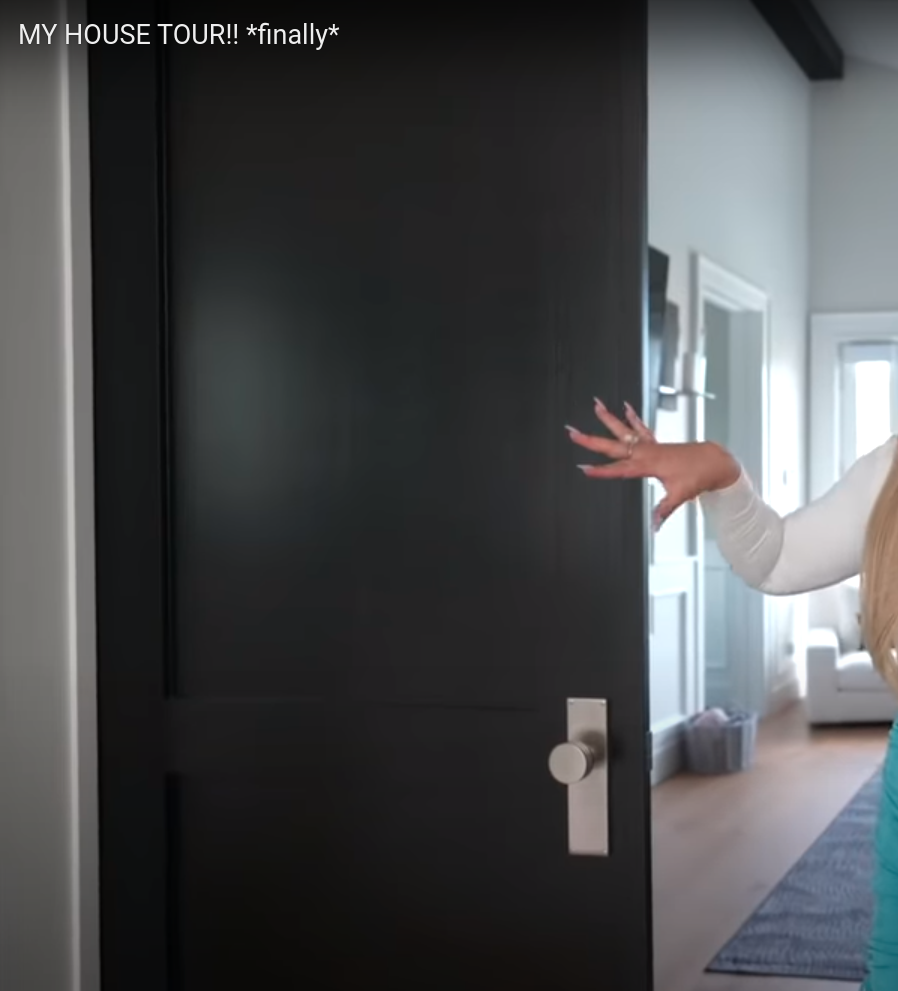

In [ ]:
#!files=(/content/my_dataset/train/images/*); NAME=${files[763]}; f="$(basename -- $NAME)"; echo $f; 

Image(filename='/content/runs/detect/exp7/Screenshot from 2021-04-27 12-18-35.png', width=600)